In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import warnings
warnings.filterwarnings("ignore", category=integrate.IntegrationWarning)


In [2]:
x_range = np.array([0,1])

In [3]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0


In [4]:
X = [x_range,f]

In [5]:
X

[array([0, 1]), <function __main__.f(x)>]

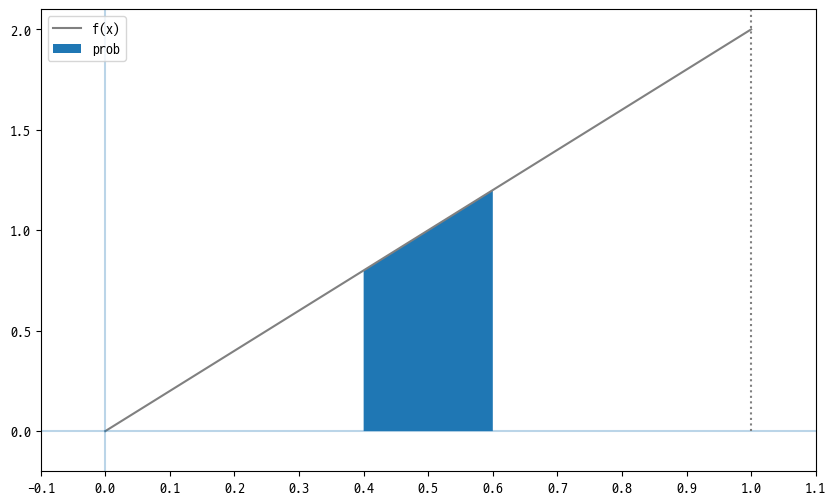

In [9]:
plt.rcParams['axes.unicode_minus'] = False
xs = np.linspace(x_range[0], x_range[1], 100)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(xs, [ f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha = 0.3)
ax.vlines(0, -0.2, 2.2, alpha = 0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', colors='gray')
xs = np.linspace(0.4, 0.6, 100)
ax.fill_between(xs, [ f(x) for x in xs], label = 'prob')
ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.2,2.1)
ax.legend()
plt.show()

In [10]:
%precision 3

'%.3f'

In [11]:
integrate.quad(f,0.4,0.6)

(0.200, 0.000)

In [12]:
from scipy.optimize import minimize_scalar

In [13]:
minimize_scalar(f)

     fun: 0
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 41
     nit: 37
 success: True
       x: -1.6180339754913822

In [14]:
integrate.quad(f,-np.inf,np.inf)

(1.000, 0.000)

In [15]:
def F(x):
    return integrate.quad(f,-np.inf,x)[0]


In [16]:
F(0.4)

0.160

In [17]:
F(0.6)

0.360

In [18]:
F(0.6)-F(0.4)

0.200

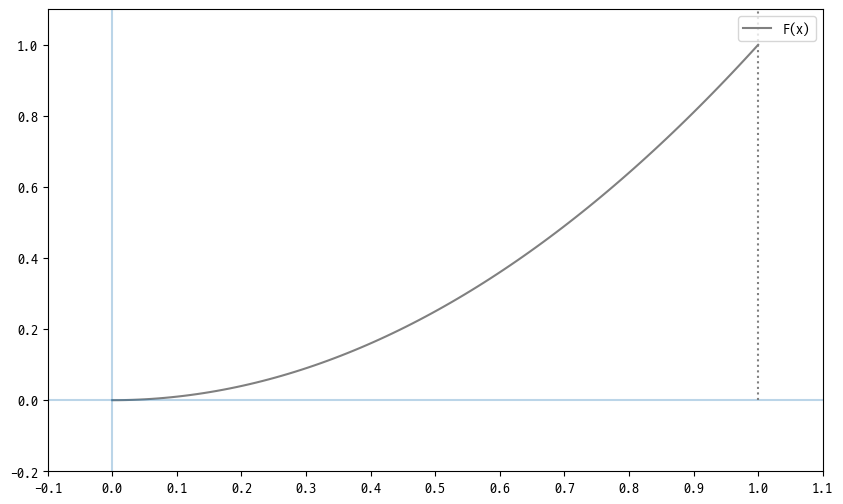

In [26]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs,[ F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha = 0.3)
ax.vlines(0, -0.2, 2.2, alpha = 0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', colors='gray')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.2,1.1)
ax.legend()
plt.show()

In [27]:
y_range=[3,5]
def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y-3)/2
    else:
        return 0
def G(y):
    return integrate.quad(g,-np.inf,y)[0]


In [28]:
def integrand(x):
    return x * f(x)

In [30]:
integrate.quad(integrand,-np.inf,np.inf)[0]

0.667